In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Loading the Data
data_train = pd.read_csv('C:/Users/Piyush/SDL Mini Project/airbnbdata/train_users_2.csv')
data_test = pd.read_csv('C:/Users/Piyush/SDL Mini Project/airbnbdata/test_users.csv')
data_train.shape, data_test.shape

((213451, 16), (62096, 15))

In [2]:
labels = data_train.country_destination.values
id_test = data_test.id
data_train.drop(['country_destination'], axis = 1)
#Concatenating train and test data for EDA
data_all = pd.concat((data_train, data_test), axis = 0, ignore_index= True)

In [3]:
data_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
data_all.shape

(275547, 16)

In [5]:
for i in data_all.columns:
    ab=data_all[i].isnull().sum()
    if ab !=0:
        print(i + " has {} null values".format(ab))
        print()

date_first_booking has 186639 null values

age has 116866 null values

first_affiliate_tracked has 6085 null values

country_destination has 62096 null values



In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [7]:
data_all = data_all.drop(['id','country_destination','date_first_booking'], axis = 1)

In [8]:
for i in data_all.columns:
    ab=data_all[i].isnull().sum()
    if ab !=0:
        print(i + " has {} null values".format(ab))
        print()

age has 116866 null values

first_affiliate_tracked has 6085 null values



In [9]:
data_all.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [10]:
data_all.gender.value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

In [11]:
data_all.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [12]:
data_all[data_all['age']<15].age = np.nan
data_all[data_all['age']>=100].age = np.nan

In [13]:
data_all.age.value_counts()

30.0      7712
28.0      7687
29.0      7647
31.0      7540
27.0      7462
          ... 
1954.0       1
1953.0       1
132.0        1
1937.0       1
112.0        1
Name: age, Length: 145, dtype: int64

In [14]:
data_all.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [15]:
#Converting below columns as categories for plotting in graphs
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method',
    'signup_flow'
]

for categorical_feature in categorical_features:
    data_all[categorical_feature] = data_all[categorical_feature].astype('category')

In [16]:
data_all['date_account_created'] = pd.to_datetime(data_all['date_account_created'])
data_all['timestamp_first_active'] = pd.to_datetime(data_all['timestamp_first_active'], format='%Y%m%d%H%M%S')


In [17]:
data_all.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


# Visualizations

In [18]:
sns.set_style('whitegrid')
sns.set_context('talk')

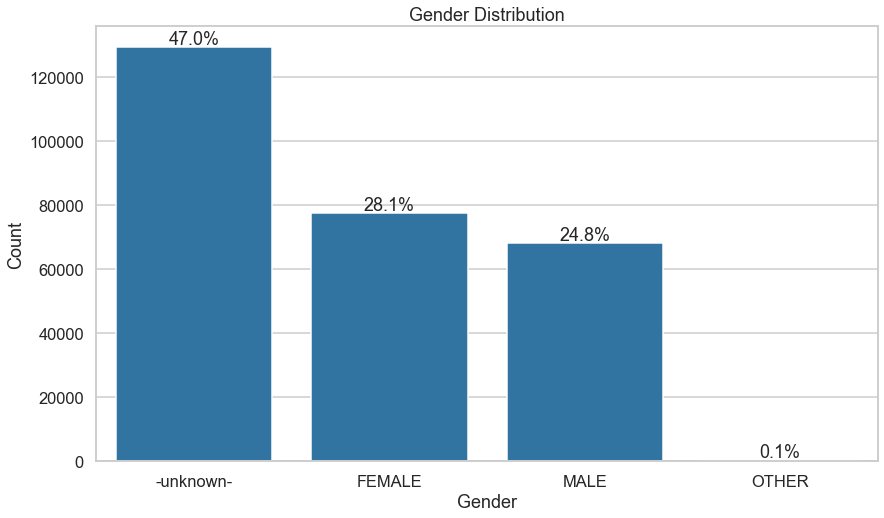

In [19]:
#Finding the gender distribution
plt.figure(figsize=(14,8))
order1 = data_all['gender'].value_counts().index
sns.countplot(data = data_all,x='gender',order=order1,color=sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
order2 = data_all['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count/data_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

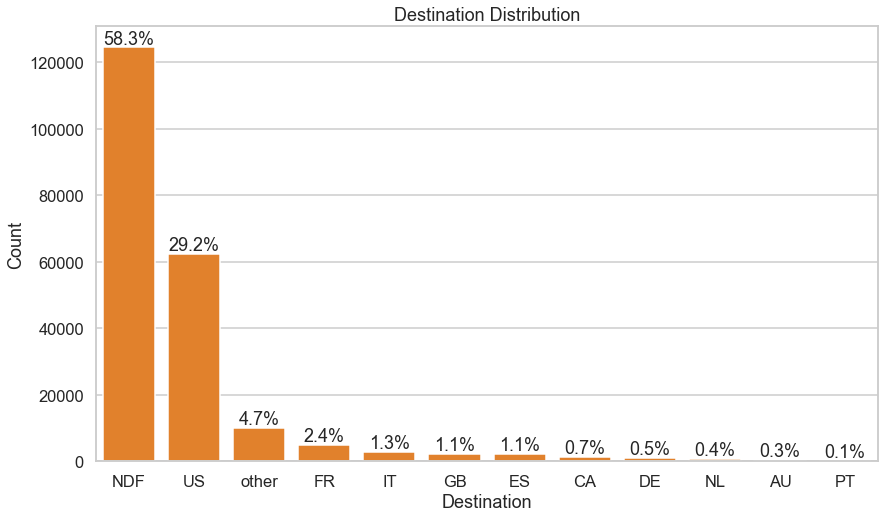

In [20]:
#Finding Destination Distribution.

plt.figure(figsize=(14,8))
order1 = data_train['country_destination'].value_counts().index
sns.countplot(data = data_train, x = 'country_destination', order = order1, color = sns.color_palette()[1])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = data_train['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / data_train.shape[0])
    plt.text(i,count+1000,strt,ha='center')

In [21]:
#Extracting year for date_account_created
data_all['acc_year'] = data_all['date_account_created'].dt.year


data1 = data_all.groupby('acc_year').count()
data1.head()

years = [2010,2011,2012,2013,2014]
yearsOrder=pd.api.types.CategoricalDtype(ordered=True, categories=years)
data1.reset_index(inplace = True)
data1.acc_year = data1.acc_year.astype(yearsOrder)

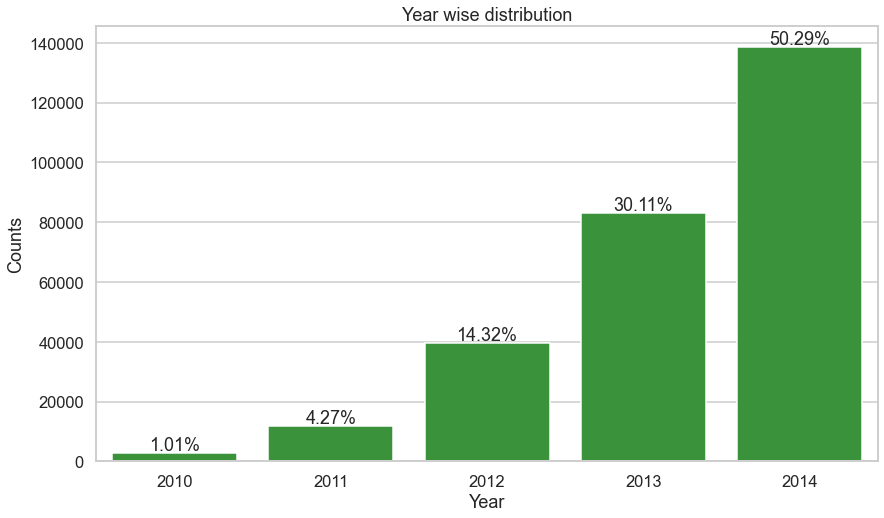

In [22]:
#Finding year-wise distribution

plt.figure(figsize=[14,8])
sns.barplot(data=data1,x='acc_year',y='affiliate_provider',color=sns.color_palette()[2]);
plt.title('Year wise distribution');
plt.xlabel('Year')
plt.ylabel('Counts')
for i in range(data1.shape[0]):
    count=data1.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/data_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

In [23]:
# Creating a month centered dataframe for 2014
data2 = data_all[data_all['date_account_created'].dt.year==2014]
data2['monthYear14'] = data2['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
data2 = data2.groupby('monthYear14').count()

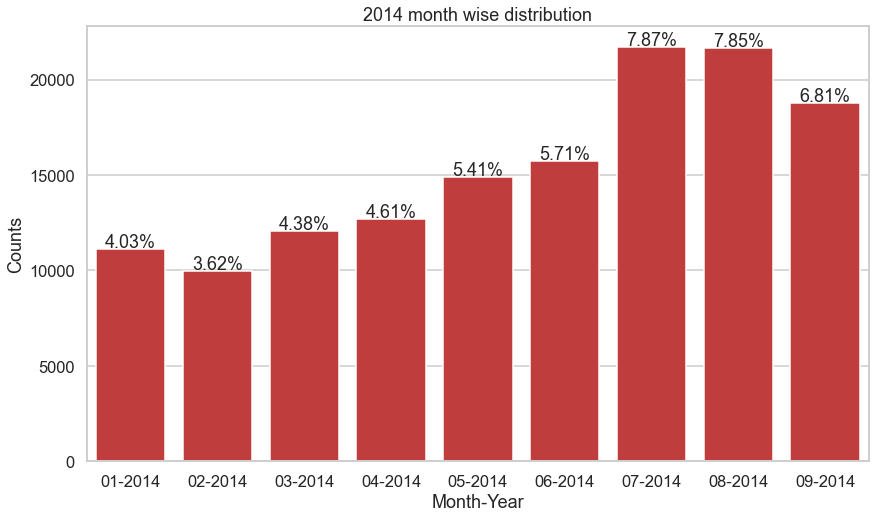

In [24]:
#Number of accounts created in different month of 2014

plt.figure(figsize=[14,8])
sns.barplot(data=data2,x=data2.index,y='affiliate_provider',color=sns.color_palette()[3]);
plt.title('2014 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
for i in range(data2.shape[0]):
    count=data2.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/data_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

In [25]:
#Dividing member ages into various bins

data_all['member_age_bins']=data_all['age'].apply(lambda x: '18 - 20' if 18<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60-70' if 60<x<=70
                                                  else '70+' if 70<x<=100
                                                  else np.nan)

In [26]:
data_all.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,acc_year,member_age_bins
0,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,NaN
1,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,30 - 40
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,50 - 60
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,40 - 50
4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,40 - 50


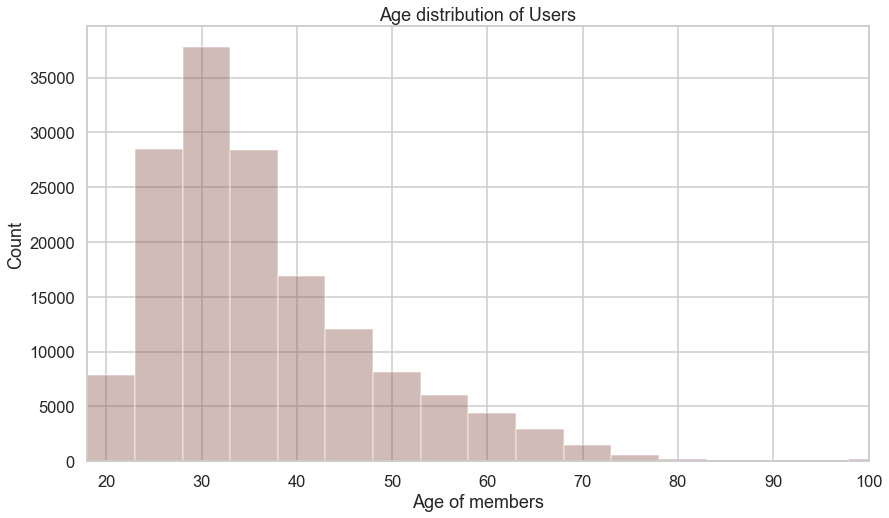

In [27]:
#Plotting Age distribution of the members
plt.figure(figsize=[14,8])
sns.distplot(data_all.age.dropna(),bins=np.arange(18,100+5,5),color=sns.color_palette()[5],kde=False);
plt.xlabel('Age of members')
plt.ylabel('Count')
plt.title('Age distribution of Users')
plt.xlim(18,100);

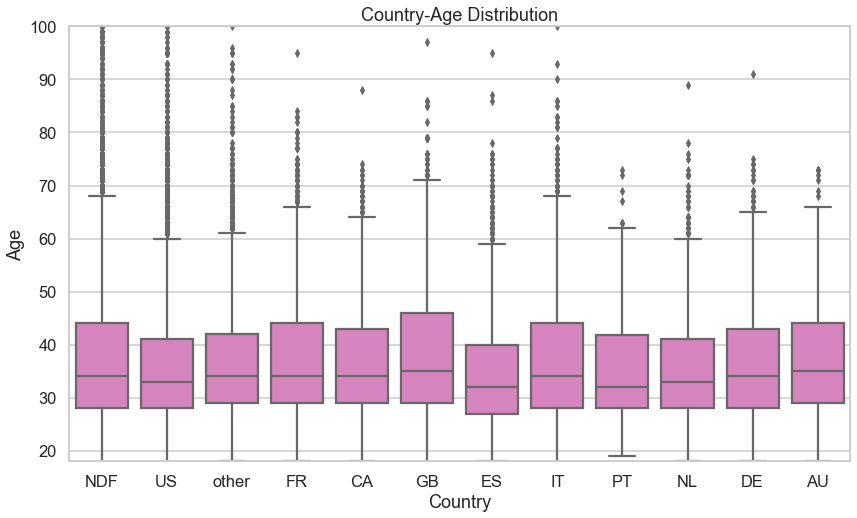

In [28]:
#Destination-Age distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=data_train,y='age',x='country_destination',color=sns.color_palette()[6]);
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

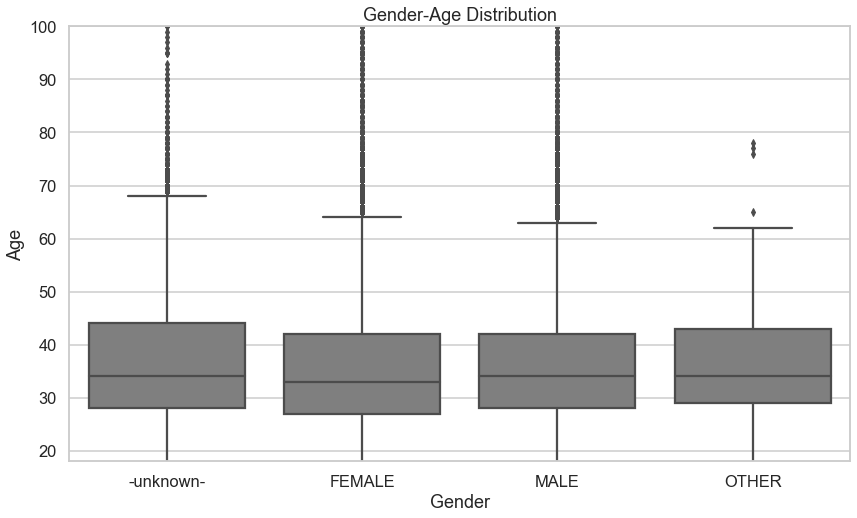

In [29]:
#Gender-Age Distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=data_all,y='age',x='gender',color=sns.color_palette()[7]);
plt.ylim(18,100)
plt.xlabel('Gender');
plt.ylabel('Age');
plt.title('Gender-Age Distribution');

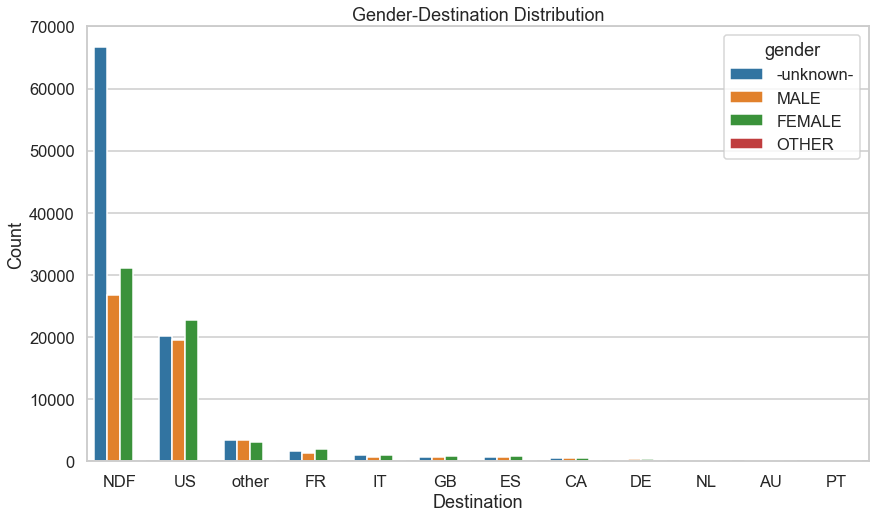

In [30]:
#Gender-Destination Distribution Plot

plt.figure(figsize=(14,8))
order1 = data_train['country_destination'].value_counts().index
sns.countplot(data = data_train, x = 'country_destination', order = order1,hue='gender')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')
order2 = data_train['country_destination'].value_counts()

In [31]:
data3 = data_all[data_all['date_account_created'].dt.year==2014]
data3['monthYear14'] = data3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

data3= data3.groupby(['monthYear14','member_age_bins']).count()

data3.reset_index(inplace=True)

Text(0, 0.5, 'Counts')

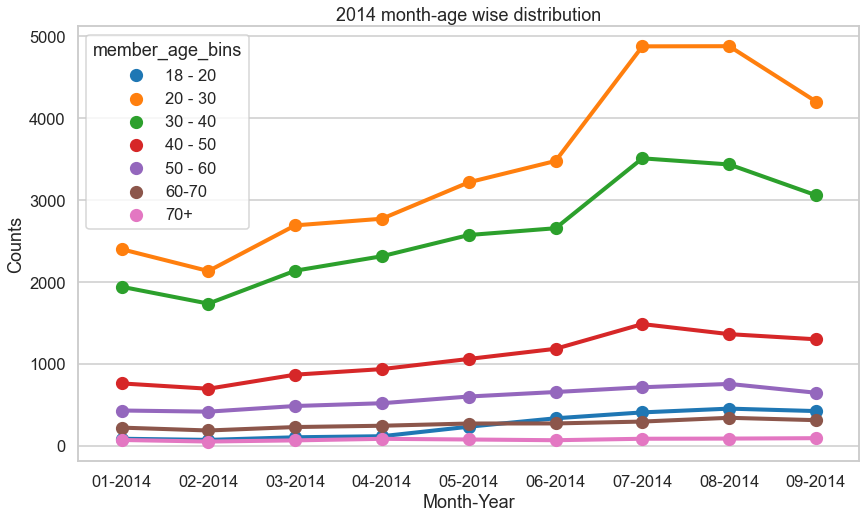

In [32]:
#Age wise distribution of the booking in different months of 2013

plt.figure(figsize=[14,8])
sns.pointplot(data=data3,x='monthYear14',y='affiliate_provider',hue='member_age_bins');
plt.title('2014 month-age wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

In [33]:
data3 = data_all[data_all['date_account_created'].dt.year==2014]
data3['monthYear14'] = data3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

data3= data3.groupby(['monthYear14','gender']).count()

data3.reset_index(inplace=True)

Text(0, 0.5, 'Counts')

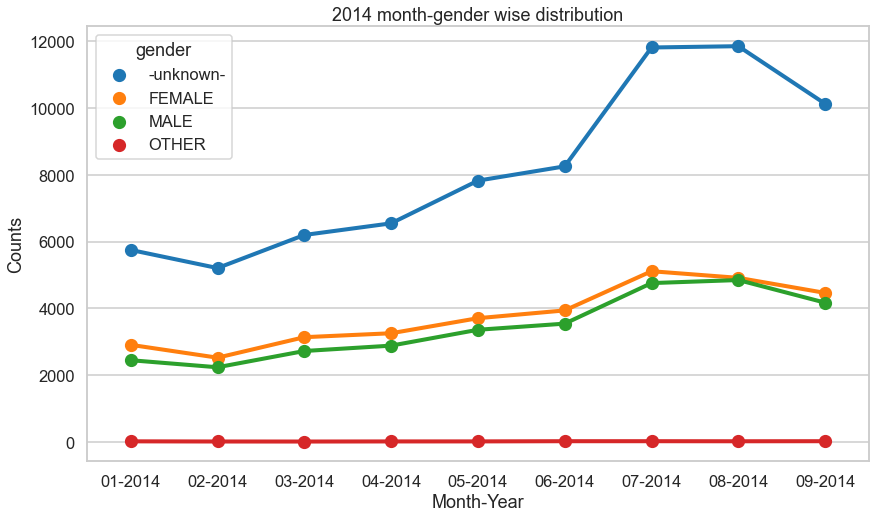

In [35]:
#Gender wise distribution of the booking in different months of 2013

plt.figure(figsize=[14,8])
sns.pointplot(data=data3,x='monthYear14',y='affiliate_provider',hue='gender');
plt.title('2014 month-gender wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

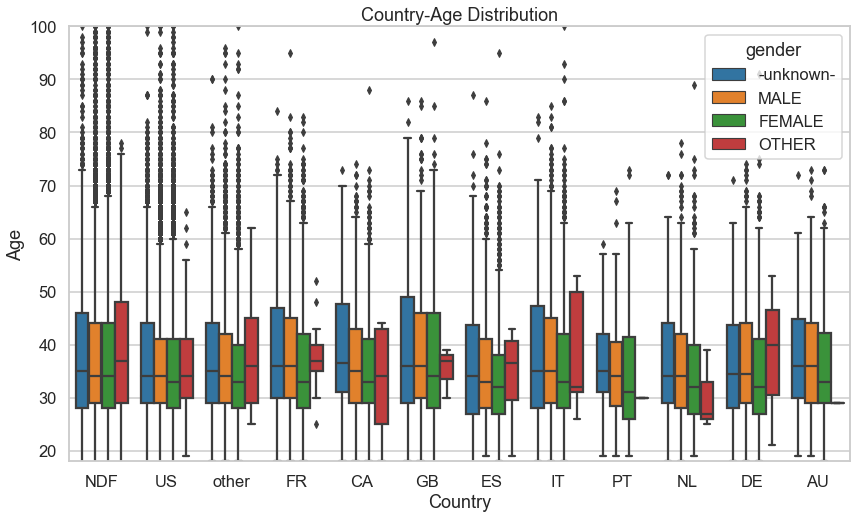

In [36]:
#Relation ship between age-gender-destination

plt.figure(figsize=[14,8])
sns.boxplot(data=data_train,y='age',x='country_destination',hue='gender');
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

# Computation for the Booking Destination

In [37]:
data_train = data_train.drop(['country_destination'], axis=1)

In [38]:
dataWork = pd.concat((data_train, data_test), axis=0, ignore_index=True)
dataWork = dataWork.drop(['id', 'date_first_booking'], axis=1)
#Filling nan
dataWork = dataWork.fillna(-1)